<a href="https://colab.research.google.com/github/yunisindhu/Robusters/blob/master/SindhuRajan_ML1Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning 1 - Assignment

In [22]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart.csv")

Encoding Categorical Value

In [27]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart.csv")
print (df.head(10))
col=df.columns.tolist()
print (col)
df["AHD_code"]=lb_make.fit_transform(df["AHD"])
df["ChestPain_code"]=lb_make.fit_transform(df["ChestPain"])
df[["ChestPain", "ChestPain_code", "AHD", "AHD_code", "Sex"]]

   Unnamed: 0  Age  Sex     ChestPain  ...  Slope   Ca        Thal  AHD
0           1   63    1       typical  ...      3  0.0       fixed   No
1           2   67    1  asymptomatic  ...      2  3.0      normal  Yes
2           3   67    1  asymptomatic  ...      2  2.0  reversable  Yes
3           4   37    1    nonanginal  ...      3  0.0      normal   No
4           5   41    0    nontypical  ...      1  0.0      normal   No
5           6   56    1    nontypical  ...      1  0.0      normal   No
6           7   62    0  asymptomatic  ...      3  2.0      normal  Yes
7           8   57    0  asymptomatic  ...      1  0.0      normal   No
8           9   63    1  asymptomatic  ...      2  1.0  reversable  Yes
9          10   53    1  asymptomatic  ...      3  0.0  reversable  Yes

[10 rows x 15 columns]
['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']


,ChestPain,ChestPain_code,AHD,AHD_code,Sex
0,typical,3,No,0,1
1,asymptomatic,0,Yes,1,1
2,asymptomatic,0,Yes,1,1
3,nonanginal,1,No,0,1
4,nontypical,2,No,0,0
...,...,...,...,...,...
298,typical,3,Yes,1,1
299,asymptomatic,0,Yes,1,1
300,asymptomatic,0,Yes,1,1
301,nontypical,2,Yes,1,0


In [28]:
print (df[["ChestPain_code", "AHD_code", "RestBP", "Chol"]].head(10))
print (df["Sex"][:10])

   ChestPain_code  AHD_code  RestBP  Chol
0               3         0     145   233
1               0         1     160   286
2               0         1     120   229
3               1         0     130   250
4               2         0     130   204
5               2         0     120   236
6               0         1     140   268
7               0         0     120   354
8               0         1     130   254
9               0         1     140   203
0    1
1    1
2    1
3    1
4    0
5    1
6    0
7    0
8    1
9    1
Name: Sex, dtype: int64


Training Set

In [29]:
X=df[["ChestPain_code", "AHD_code", "RestBP", "Chol"]].values; X=X.astype(int)
y=df[["Sex"]].values; y=y.astype(int)
print (X.shape, y.shape)

(303, 4) (303, 1)


In [30]:
print (X.astype(int), X.shape)
print (y, y.shape)

[[  3   0 145 233]
 [  0   1 160 286]
 [  0   1 120 229]
 ...
 [  0   1 130 131]
 [  2   1 130 236]
 [  1   0 138 175]] (303, 4)
[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 

Linear Discriminant Analysis

In [31]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=400, n_features=4, n_informative=4, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.732 (0.076)


Converting AHD to Binary

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import datasets, linear_model
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [33]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AHD_code,ChestPain_code
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,3
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,0
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,1
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,2


In [34]:
AHD_map = {'Yes': 1, 'No': 0}
df['AHD'] = df['AHD'].map(AHD_map)

In [35]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AHD_code,ChestPain_code
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,0,3
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,1,0
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,0,1
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,0,2


In [36]:
count_nan = df['Thal'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 2


In [39]:
df['Thal'] = df['Thal'].replace(np.nan, 0)

In [40]:
count_nan = df['Ca'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 4


In [41]:
df['Ca'] = df['Ca'].replace(np.nan, 0)

In [42]:
count_nan = df['Ca'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 0


In [43]:
df.AHD.value_counts()

0    164
1    139
Name: AHD, dtype: int64

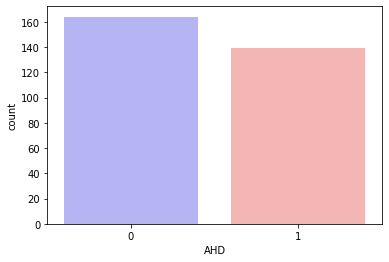

In [44]:
sns.countplot(x="AHD", data=df, palette="bwr")
plt.show()

In [45]:
countNoDisease = len(df[df.AHD == 0])
countHaveDisease = len(df[df.AHD == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.AHD))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.AHD))*100)))

Percentage of Patients Haven't Heart Disease: 54.13%
Percentage of Patients Have Heart Disease: 45.87%


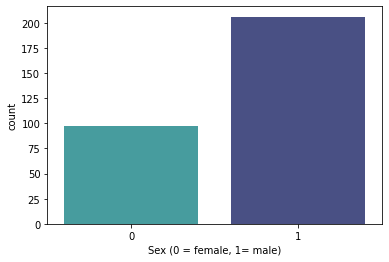

In [46]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [48]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

Percentage of Female Patients: 32.01%
Percentage of Male Patients: 67.99%


In [49]:
df.groupby('AHD').mean()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD_code,ChestPain_code
AHD,,,,,,,,,,,,,,
0,148.073171,52.585366,0.560976,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.268293,0.0,1.207317
1,156.633094,56.625899,0.820144,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.129496,1.0,0.410072


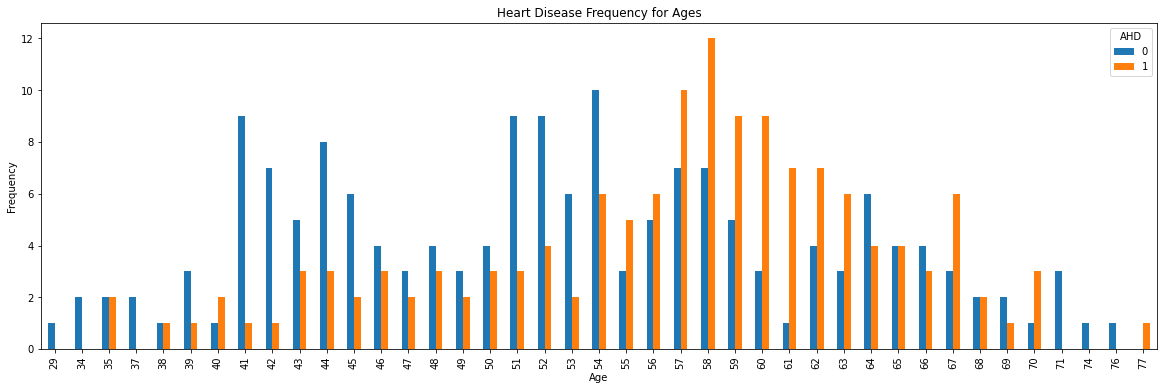

In [50]:
pd.crosstab(df.Age,df.AHD).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

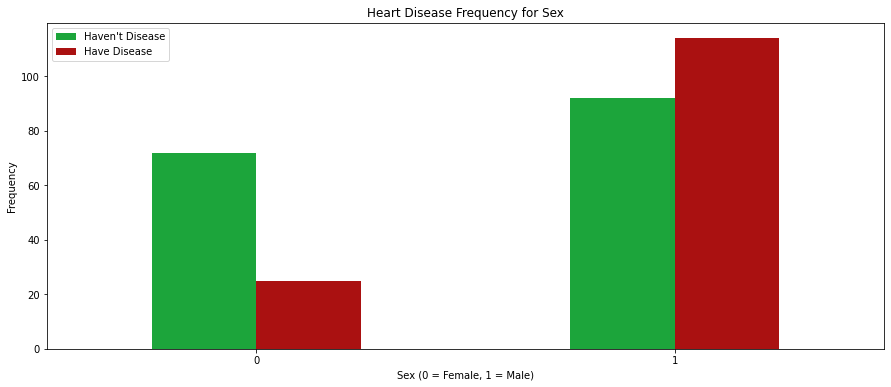

In [51]:
pd.crosstab(df.Sex,df.AHD).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

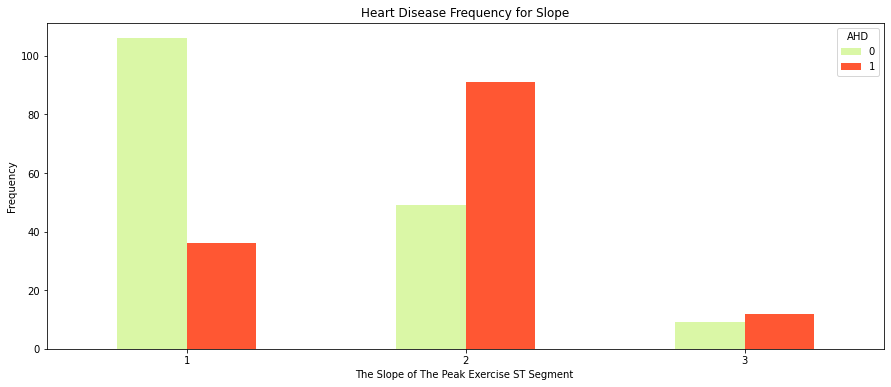

In [53]:
pd.crosstab(df.Slope,df.AHD).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

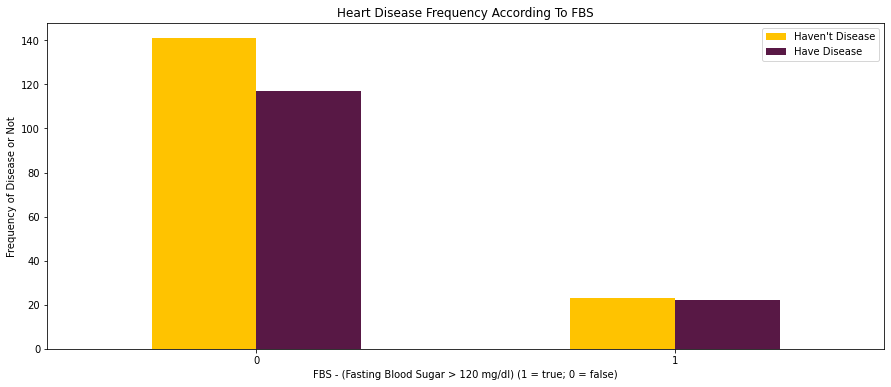

In [54]:
pd.crosstab(df.Fbs,df.AHD).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

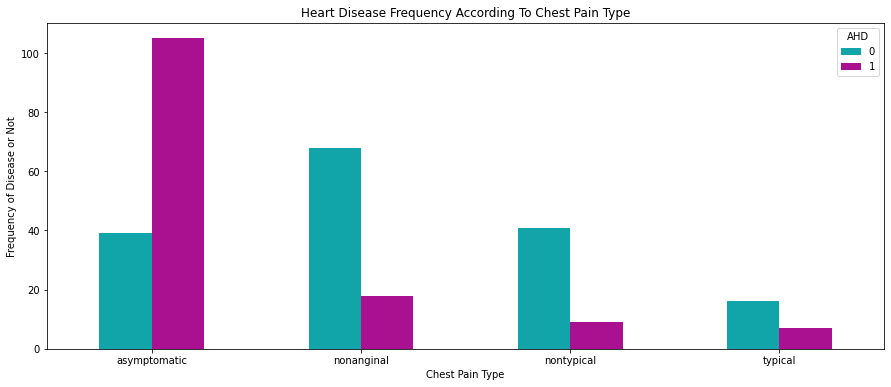

In [55]:
pd.crosstab(df.ChestPain,df.AHD).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [57]:
a = pd.get_dummies(df['ChestPain'], prefix = "ChestPain")
b = pd.get_dummies(df['Thal'], prefix = "Thal")
c = pd.get_dummies(df['Slope'], prefix = "Slope")

Logistic Regression with L2 regularization

In [58]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,AHD_code,ChestPain_code,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,0,3,0,0,0,1,0,1,0,0,0,0,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1,1,0,1,0,0,0,0,0,1,0,0,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,1,0,1,0,0,0,0,0,0,1,0,1,0
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,0,2,0,0,1,0,0,0,1,0,1,0,0


In [59]:
df = df.drop(columns = ['ChestPain', 'Thal', 'Slope'])
df.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Ca,AHD,AHD_code,ChestPain_code,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,1,63,1,145,233,1,2,150,0,2.3,0.0,0,0,3,0,0,0,1,0,1,0,0,0,0,1
1,2,67,1,160,286,0,2,108,1,1.5,3.0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2.0,1,1,0,1,0,0,0,0,0,0,1,0,1,0
3,4,37,1,130,250,0,0,187,0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,5,41,0,130,204,0,2,172,0,1.4,0.0,0,0,2,0,0,1,0,0,0,1,0,1,0,0
